# IMPORTS

In [1]:
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


--2020-03-09 17:46:02--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.5’

root_v6.13.08.Linux 100%[===================>] 131.05M  25.9MB/s    in 5.8s    

2020-03-09 17:46:09 (22.4 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.5’ saved [137415272/137415272]



In [7]:
# now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

<CDLL '/content/APPS/root/lib/libGraf3d.so', handle 559d060c4d00 at 7f4765c5dbd0>

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN and parse the file

In [4]:
#Import brings the ROOT framework into our python environment.
import ROOT
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")

Welcome to JupyROOT 6.13/08
--2020-03-09 17:47:14--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.82.144, 188.184.28.138, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.82.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.4’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  25.5MB/s    in 18s     

2020-03-09 17:47:32 (24.0 MB/s) - ‘B2HHH_MagnetUp.root.4’ saved [444723234/444723234]



# Test if ROOT works

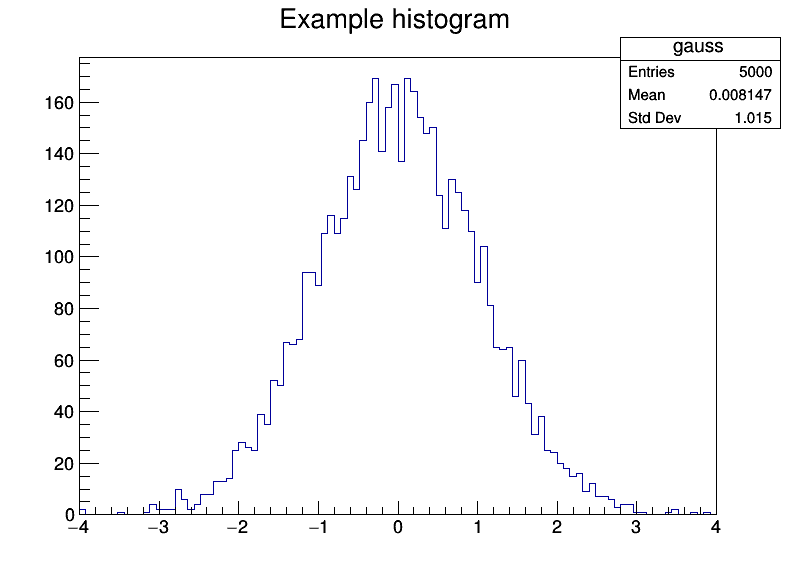

In [6]:
#Now we can check if we have everything working as we expect: 
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()


# Task Description


This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

# Helper Functions

In [0]:
################### HELPER FUNCTIONS #################################
c = 299792458
mass_kaon = 493.677

'''adds momenta in xyz direction to get total momentum'''
def get_daughter_momentum(daughter):
  return "(sqrt(("+daughter+"_PX)**2+ ("+daughter+"_PY)**2 + ("+daughter+"_PZ)**2))" #do we add daughter to momentum just to specify the momentum of which particle we need to take into account
  
'''Computes energy of Kaon daughter'''
def get_energy(daughter):
  return "(sqrt("+get_daughter_momentum(daughter)+"**2+"+str(mass_kaon)+"**2))"


'''Gets momentum of B-meson mother'''
def get_mother_momentum():
  X = "(H1_PX+"+"H2_PX+"+"H3_PX)"
  Y = "(H1_PY+"+"H2_PY+"+"H3_PY)"
  Z = "(H1_PZ+"+"H2_PZ+"+"H3_PZ)"
  return "(sqrt("+X+"**2+"+Y+"**2+"+Z+"**2))"

'''Gets energy of mother B-meson'''
def get_mother_energy():
  return "("+get_energy('H1')+"+"+get_energy('H2')+"+"+get_energy('H3')+")"

'''Gets the mass of mother B-meson'''
def get_mass():
  return "(sqrt("+get_mother_energy()+"**2-"+get_mother_momentum()+"**2))"


#Graphs


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3238126 out of range events


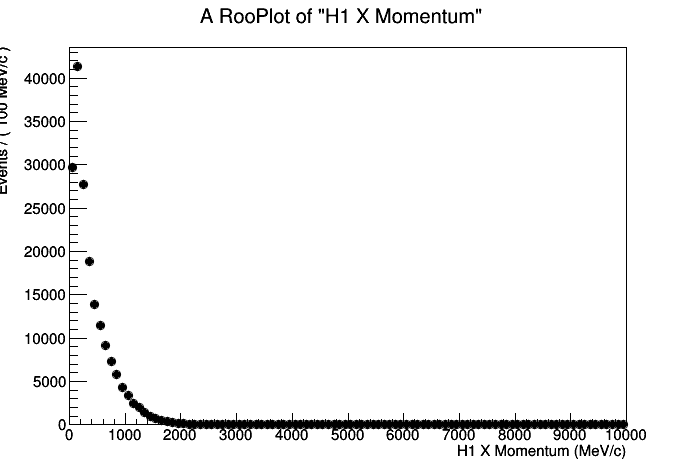

In [9]:
####################### EXAMPLE Graph ##############################

# Grab variables
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# create dataset
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# create canvas, 
c = ROOT.TCanvas("c","c")
# create plot
frame = xmomentum.frame()
data.plotOn(frame)
# draw plot
frame.Draw()
c.Draw()

Now plot the total momentum for one (or more) of the daughter particles.

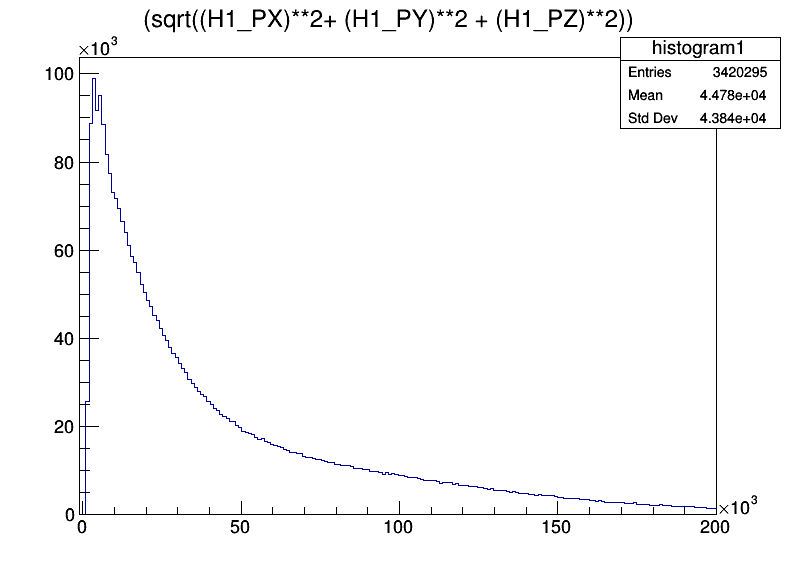

In [10]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_daughter_momentum('H1')+">>histogram1(200,-1000,200000)")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


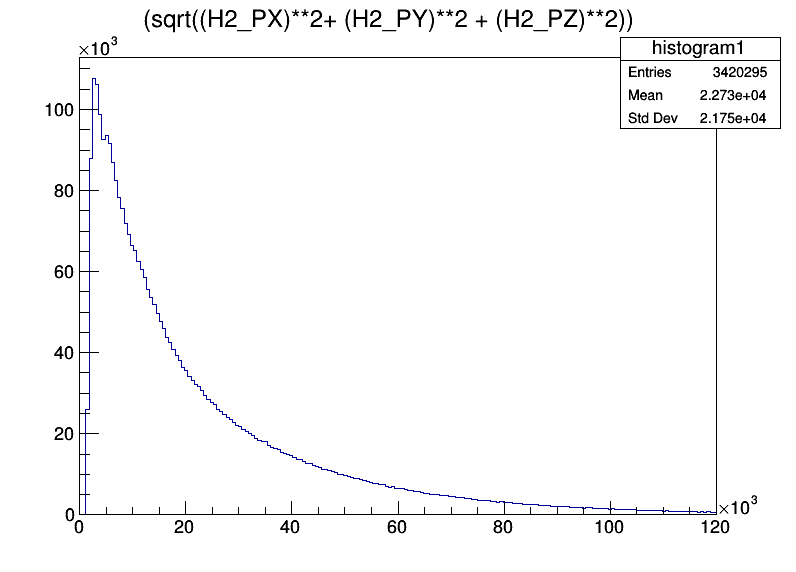

In [11]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_daughter_momentum('H2')+">>histogram1(200,0,120000)")
c.Draw()

0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


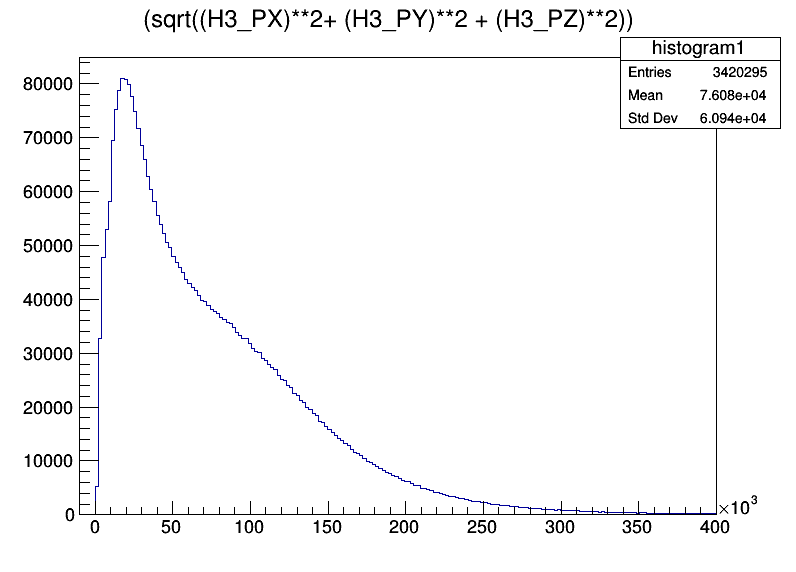

In [12]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_daughter_momentum('H3')+">>histogram1(200,-10000,400000)")
print(tree.Branch("sqrt(H3_PX**2+H3_PY**2+H3_PZ**2)"))
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


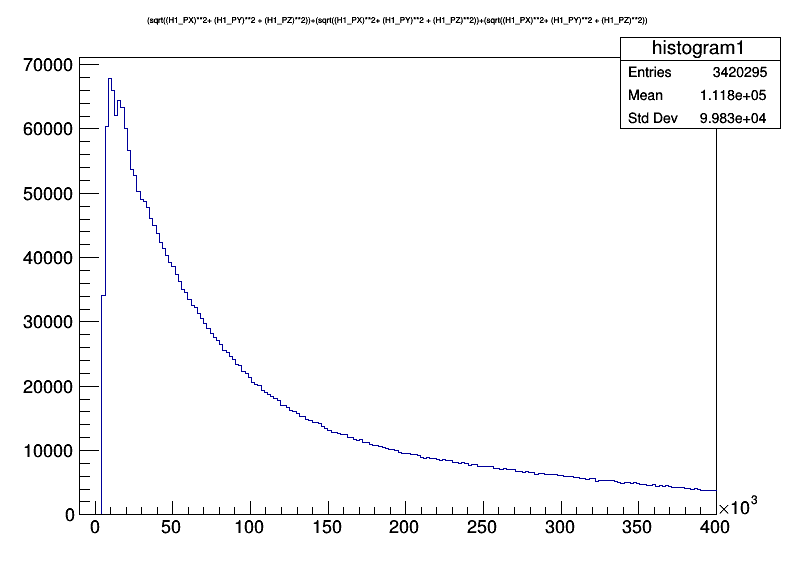

In [13]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_daughter_momentum('H1')+"+"+get_daughter_momentum('H1')+"+"+get_daughter_momentum('H1')+">>histogram1(200,-10000,400000)")
c.Draw()

The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


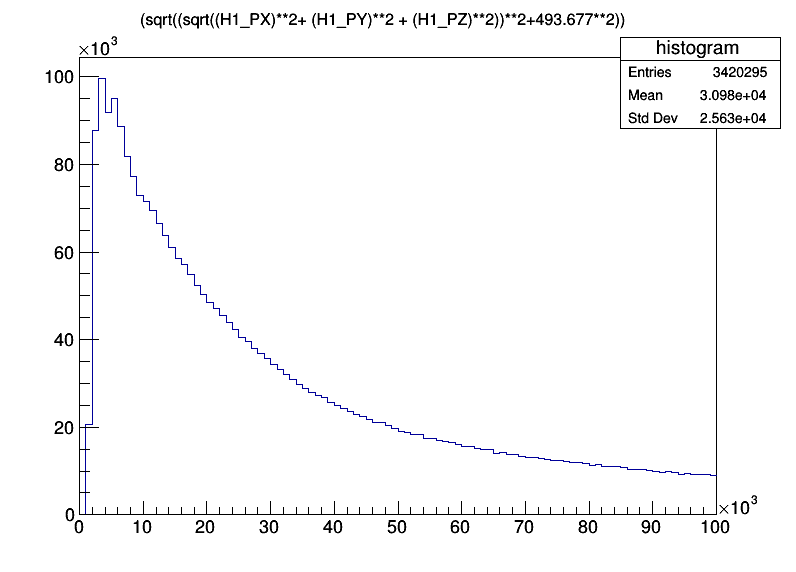

In [14]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_energy("H1")+">>histogram(100,0,100000)")
c.Draw()

We have now completed the initial steps and begun to work through what we need to with the data. This workflow is divided into 4 stages, just for easier viewing and comprehension.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


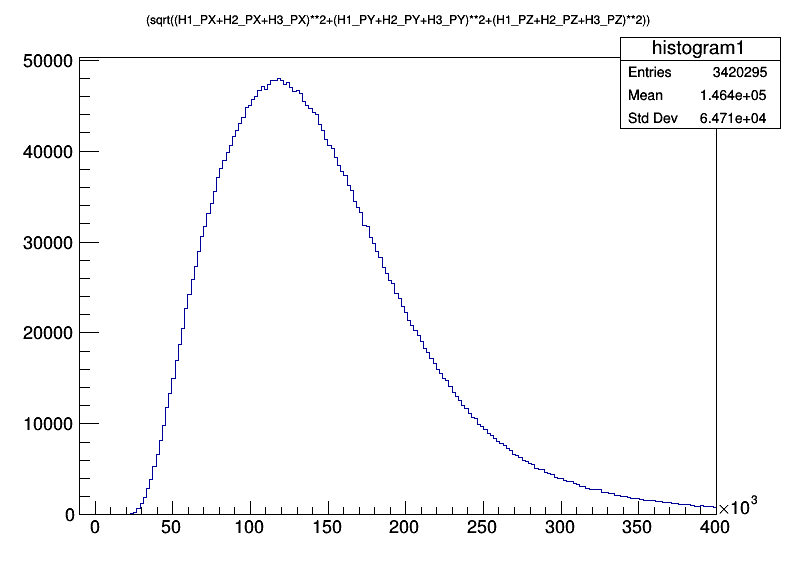

In [15]:
#Calculate the momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
#to get a total x momentum of the mother; then you can combine your three momenta into total momentum

# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_mother_momentum()+">>histogram1(200,-10000,400000)")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


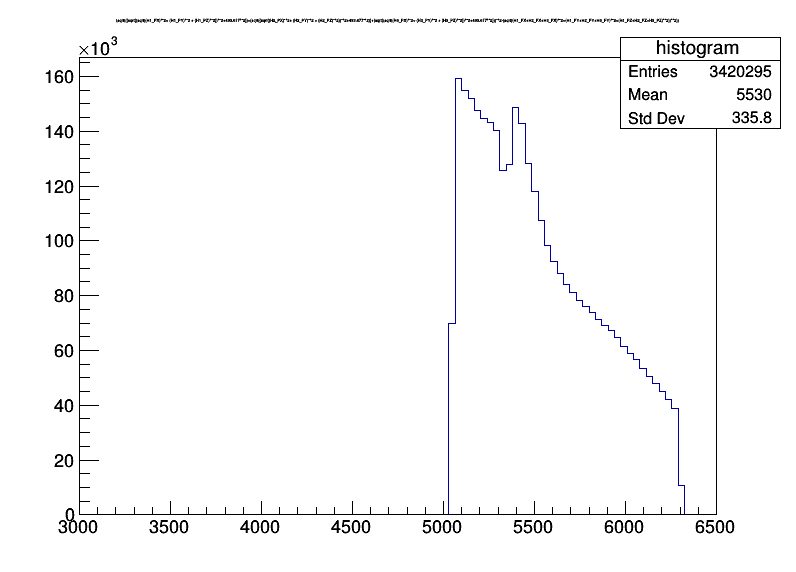

In [16]:
#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)

d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw(get_mass()+">>histogram(100,3000,6500)")
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


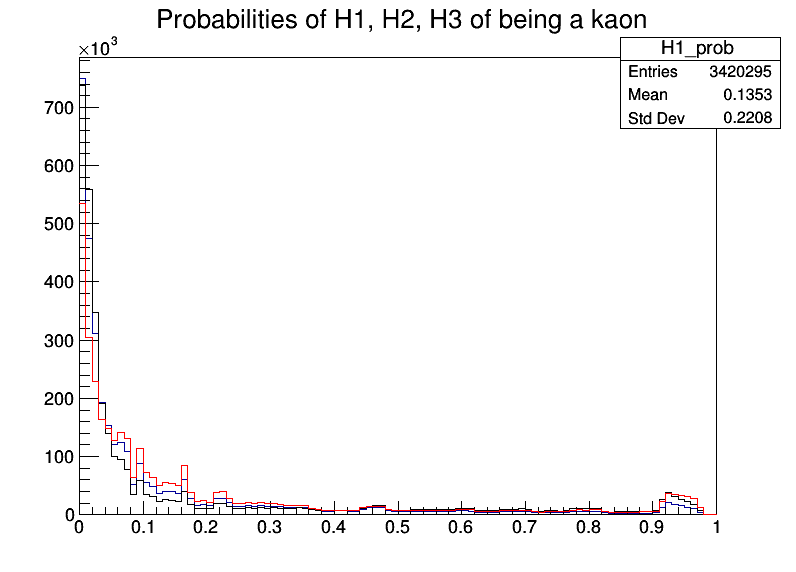

In [17]:
#Make plots of H1/H2/H3 _ProbK on one plot
d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H1_ProbK>>H1_prob(100,0,1)")
tree.Draw("H2_ProbK>>H2_prob(100,0,1)")
tree.Draw("H3_ProbK>>H3_prob(100,0,1)")
histogram1 = ROOT.gDirectory.Get("H1_prob")
histogram2 = ROOT.gDirectory.Get("H2_prob")
histogram3 = ROOT.gDirectory.Get("H3_prob")
histogram1.Draw()
histogram1.SetTitle(" Probabilities of H1, H2, H3 of being a kaon")
histogram2.SetLineColor(1)
histogram2.Draw('same')
histogram3.SetLineColor(2)
histogram3.Draw('same')
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


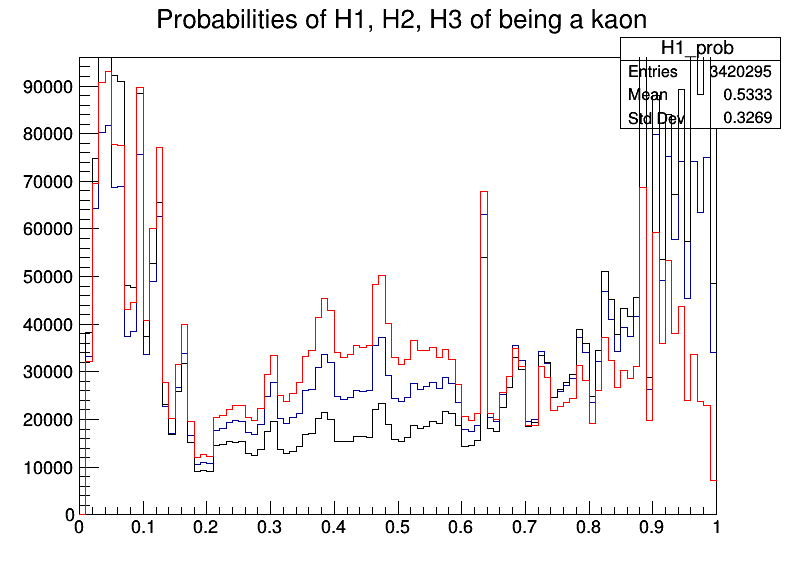

In [18]:
#Make plots of H1/H2/H3 _ProbK on one plot
d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H1_ProbPi>>H1_prob(100,0,1)")
tree.Draw("H2_ProbPi>>H2_prob(100,0,1)")
tree.Draw("H3_ProbPi>>H3_prob(100,0,1)")
histogram1 = ROOT.gDirectory.Get("H1_prob")
histogram2 = ROOT.gDirectory.Get("H2_prob")
histogram3 = ROOT.gDirectory.Get("H3_prob")
histogram1.Draw()
histogram1.SetTitle(" Probabilities of H1, H2, H3 of being a kaon")
histogram2.SetLineColor(1)
histogram2.Draw('same')
histogram3.SetLineColor(2)
histogram3.Draw('same')
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


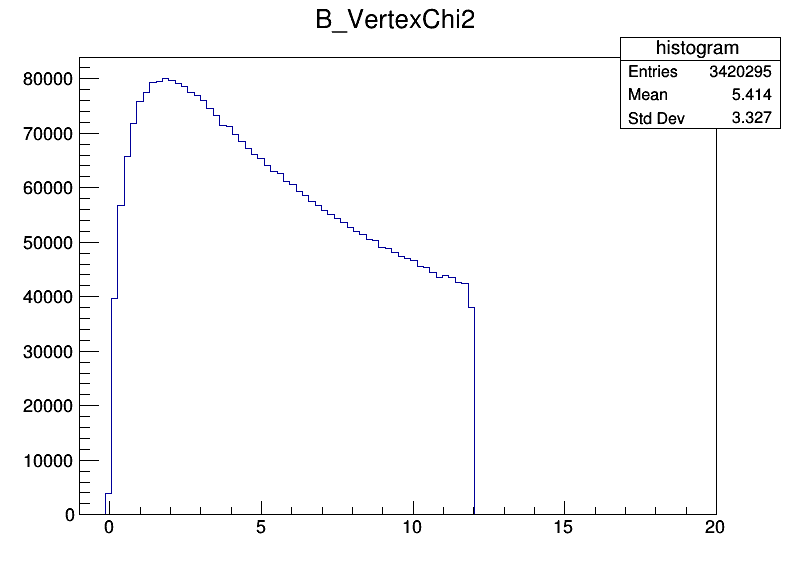

In [19]:
#For all our particles, make a plot of the B_VertexChi2

e=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("B_VertexChi2"+">>histogram(100,-1,20)")
histogram1 = ROOT.gDirectory.Get("histogram")
e.Draw()

# Something 1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


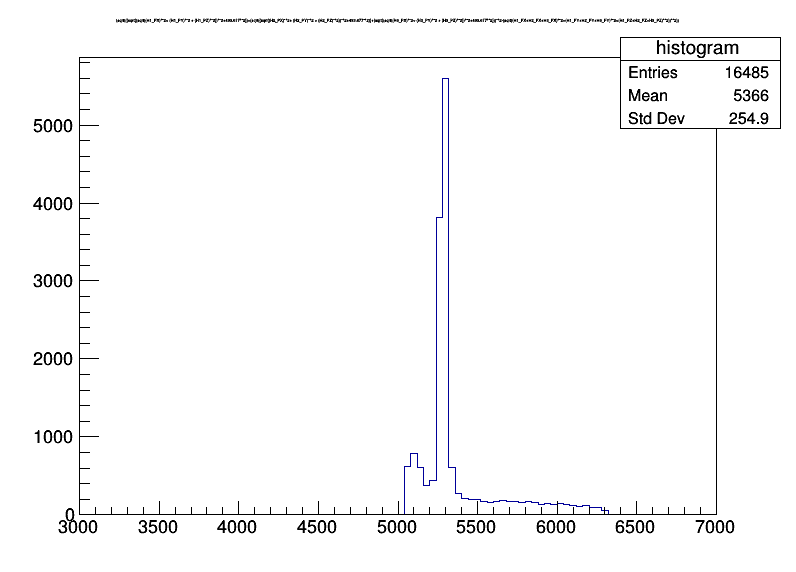

In [20]:
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) 
#and put the new data in CutTree

selection=("H1_ProbK>0.4&H1_ProbPi<0.6&H2_ProbK>0.4&H2_ProbPi<0.6&H3_ProbK>0.4&H1_ProbPi<0.6&!H1_isMuon")
CutTree=tree.CopyTree(selection)
d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
CutTree.Draw(get_mass()+">>histogram(100,3000,7000)")
mass_histogram = ROOT.gDirectory.Get("histogram")
d.Draw()

# NOOOOOOTEEE: Look at our result exactly matching the literature (5366MeV)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Error in <TSelectorDraw::Begin>: Two open or close brackets found, hname=histogram2(100,0,70)0)


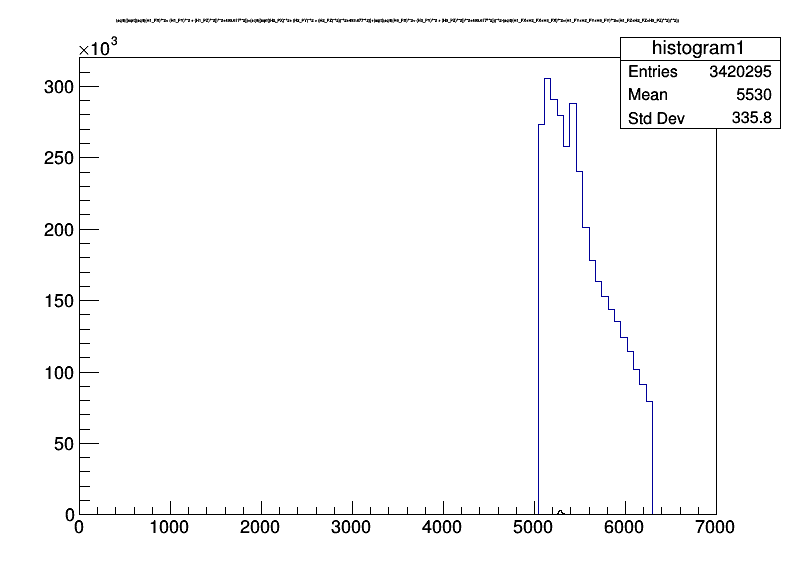

In [105]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw(get_mass()+">>histogram1(100,0,7000)")
CutTree.Draw(get_mass()+">>histogram2(100,0,70)0)")
histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram1.Draw()
histogram2.SetLineColor(1)
histogram2.Draw('same')
d.Draw()

# it is noticable the the cut removes almost all particles, leaving the second 
# diagram barely visible, but as seen in the earlier diagram we still get a 
# decent spread over 16000 values

In [21]:
import math
#First we define our physical measurement we want to fit using the RooRealVar
# variable=ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
m = ROOT.RooRealVar("B_Mass", "Mass", 0, 7000, "MeV/C^{2}")
#The remainder of the variables we need to pass into our model. E.g. for a gaussian, we need a mean and a width parameter to vary
#For these RooRealVar's we add three numbers, a "starting value" and min/max values

gauss_mean=ROOT.RooRealVar("gauss_mean","Mean",5300,5000,5500)
gauss_width=ROOT.RooRealVar("gauss_width","Width",40,0,7000)

#Now we have enough to make our Model for the signal:
# ROOT.RooGaussion = None
Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",m,gauss_mean,gauss_width)

#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.2, -2, +2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",m,exponent)

m1 = ROOT.RooDataHist("B_Mass", "Mass", ROOT.RooArgList(m), mass_histogram, 1.0)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add a scaling factor to fit what ratio of the two are used:

sig_frac=ROOT.RooRealVar("Signal Fraction","sigfrac", 0.5, 0, 1)
# just to make it work we'll set sig_frac to 0
# sig_frac = 0
model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(sig_frac))

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B_Mass): fit range of variable B_Mass expanded to nearest bin boundaries: [0,7000] --> [3000,7000]


In [22]:
# Put our data set into a RooDataSet structure
# data_to_fit=ROOT.RooDataSet("Data Set Cut","data_to_fit", CutTree, ROOT.RooArgSet(m))
data_to_fit=m1

# data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
 
#Then we can do the fitting:

model.fitTo(data_to_fit)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 exponent    -2.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     3 gauss_mean   5.30000e+03  5.00000e+01    5.00000e+03  5.50000e+03
     4 gauss_width   4.00000e+01  2.00000e+01    0.00000e+00  7.00000e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2000           1
 **********
 FI

[#0] ERROR:Plotting -- RooAbsPdf::plotOn(Full Model) ERROR: component selection expression 'Gauss' does not select any components of p.d.f.
[#0] ERROR:Plotting -- RooAbsPdf::plotOn(Full Model) ERROR: component selection expression 'Bkgnd' does not select any components of p.d.f.


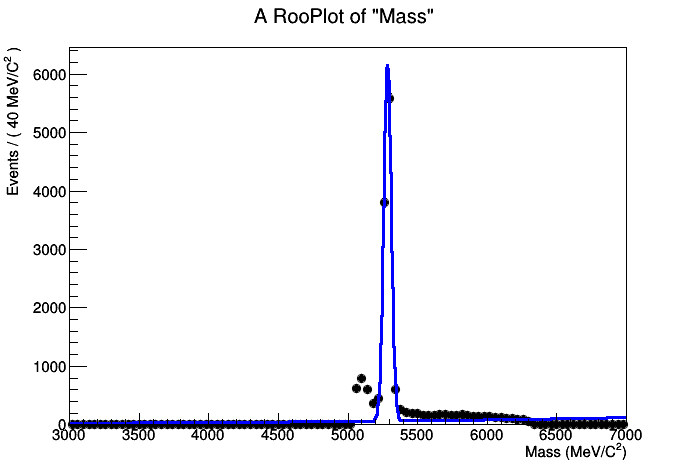

In [23]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=m.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()

In [24]:
# split the sets into 2*K- 1*K+ vs 1*K- 2*K+
selectionBPos=("(H1_Charge==1&H2_Charge==1&H3_Charge==-1)||(H1_Charge==1&H2_Charge==-1&H3_Charge==1)||(H1_Charge==-1&H2_Charge==1&H3_Charge==1)")
selectionBNeg=("(H1_Charge==-1&H2_Charge==-1&H3_Charge==1)|(H1_Charge==-1&H2_Charge==1&H3_Charge==-1)|(H1_Charge==1&H2_Charge==-1&H3_Charge==-1)")
treeBPos=CutTree.CopyTree(selectionBPos)
treeBNeg=CutTree.CopyTree(selectionBNeg)

# gets amount of entires per tree
nBPos = float(CutTree.GetEntries(selectionBPos))
nBNeg = float(CutTree.GetEntries(selectionBNeg))
print(nBPos)
print(nBNeg)

8502.0
7983.0


In [25]:
import math
# do calculatioins to find confidence interval
A = (nBNeg-nBPos)/(nBNeg+nBPos)
print(A)
sigmaA = math.sqrt((1-A**2)/(nBNeg+nBPos))
print(sigmaA)
print("5 stdev range:", A-5*sigmaA, "to", A+5*sigmaA)

# This means that we cannot confirm a CP violation here - 0 (same amount of
# matter and antimatter) is within our confidence interval

-0.031483166515
0.00778466957486
('5 stdev range:', -0.07040651438933593, 'to', 0.007440181359308622)
